### Perceptron

* In 1943 McCulloch and Pitts proposed a model of a neuron and showed how this could be used for logical computations, e.g. AND, OR, NOT, and C = A & (=! B). 
* The perceptron takes multiple inputs and outputs 1 or 0 depending on whether a product of the inputs and weights is above or below some threshold value. 
* The step function giving 1 or 0 used in the Perceptron is the Heavside 
* TLU means threshold logical unit; a neuron
* Lots of potential ways of arranging TLUs
* When all neurons in a layer are connected to all those in layer before then later layer is *a fully connected layer* or *dense layer* 

### Learning rule 

new_weight = old_weight + [(learning rate) * (diff between target and actual output) * input]

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2,3)] # only loading petal length and width
y = (iris.target == 0).astype(int) # give 1 if type is equal to zero, i.e. iris setosa

In [3]:
per_clf = Perceptron()
per_clf.fit(X, y)

y_pred = per_clf.predict([[2,0.5]])

In [4]:
y_pred

array([0])

### Multilayer perceptron

Stacking multiple layers of TLUs can allow more complex categorisation. These were difficult to train, until 1986 paper that proposed backpropagation which can work out the gradients for every model parameter. 

### Backpropagation

* Take a small-ish batch of samples from the total training set, and pass them through the neural network. Doing the steps below for the whole training set, is one *epoch*. 
* Pass all the samples in the batch from inputs through to outputs, then measure the difference between actual and predicted outputs
* Store all of the intermediate calculations and values of each intermediate node
* Calculate how much error each of the nodes on the last layer made to the final classification
* It then works out how much the errors in those nodes came from the nodes before it, working backwards to the input layer
* Finally there is a gradient descent step
* The activation function was changed to a logistic (sigmoid) function so there was a gradient to work with

### Using MLP for regression

* One neuron can predict one output variable
* In general regression MLPs should not have an activation function, but you can use them to bound results if needed
* People often use MSE but could use MAE if there are lots of errors in the training data
* Huber losss is a combination of MSE and MAE
* For regression, people typically use 1-5 layers of 10-100 neurons

### Using MLP for classification

* One node for each class
* Output layer is often logistic or softmax so it's smooth
* Loss function is cross entropy (covered later)

## Building an image classifier using the sequential API

In [6]:
import tensorflow as tf
from tensorflow import keras

2022-05-27 13:12:44.314080: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-05-27 13:12:44.314104: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [7]:
tf.__version__

'2.9.1'

In [8]:
keras.__version__

'2.9.0'

In [9]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [10]:
print(X_train_full.shape, X_train_full.dtype)

(60000, 28, 28) uint8


Rescaling values to be between 0 and 1, and also creating a validation set of the first 5000 images

In [12]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

In [13]:
# creating the class names, not provided in the down load

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [14]:
class_names[y_train[0]]

'Coat'

In [20]:
import matplotlib.pyplot as plt

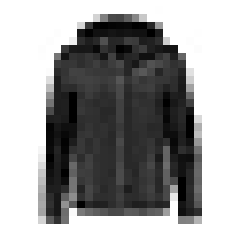

In [21]:
X_train[0].shape

plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [22]:
# Building the neural network

model = keras.models.Sequential() # a stack of layers
model.add(keras.layers.Flatten(input_shape=[28,28])) # simply takes in an array of 28x28 and flattens it to 784*1
model.add(keras.layers.Dense(300, activation="relu")) # dense/ fully connected layer
model.add(keras.layers.Dense(300, activation="relu"))  
model.add(keras.layers.Dense(10, activation="softmax")) # uses softmax because the classes are exclusive (?)


2022-05-27 13:32:05.336583: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-05-27 13:32:05.336619: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-05-27 13:32:05.336648: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (ben-ThinkPad-X1-Carbon-5th): /proc/driver/nvidia/version does not exist
2022-05-27 13:32:05.336928: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 300)               90300     
                                                                 
 dense_2 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [24]:
model.compile(loss="sparse_categorical_crossentropy",
                optimizer="sgd", 
                metrics=["accuracy"])

In [25]:
history = model.fit(X_train, y_train, epochs=30, 
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.7253 - accuracy: 0.7652 - val_loss: 0.5121 - val_accuracy: 0.8266
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4898 - accuracy: 0.8293 - val_loss: 0.5010 - val_accuracy: 0.8144
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4454 - accuracy: 0.8452 - val_loss: 0.4131 - val_accuracy: 0.8596
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4174 - accuracy: 0.8534 - val_loss: 0.3960 - val_accuracy: 0.8640
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3972 - accuracy: 0.8608 - val_loss: 0.3809 - val_accuracy: 0.8700
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3808 - accuracy: 0.8662 - val_loss: 0.3703 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3676 - accuracy: 0.8691 - val_loss: 0.3723 - val_accuracy:

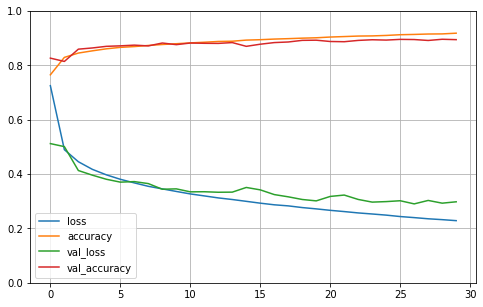

In [26]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [40]:
X_new = X_test[15:17]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 26ms/step


array([[0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [41]:
# y_pred = model.predict_classes(X_new)

# Removed in newer tf - https://keras.rstudio.com/reference/predict_proba.html#details

np.argmax(model.predict(X_new), axis=1)

1/1 [==============================] - 0s 22ms/step


array([1, 2])

In [42]:
y_preds = np.argmax(model.predict(X_new), axis=1)

1/1 [==============================] - 0s 37ms/step


In [43]:
np.array(class_names)[y_preds]

array(['Trouser', 'Pullover'], dtype='<U11')

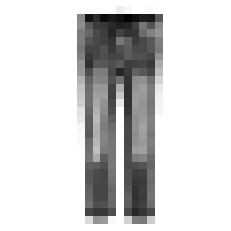

In [46]:
plt.imshow(X_test[15], cmap="binary")
plt.axis("off")
plt.show()

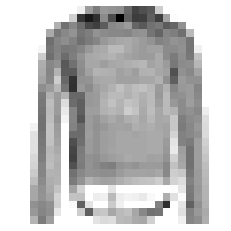

In [47]:
plt.imshow(X_test[16], cmap="binary")
plt.axis("off")
plt.show()